### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [3]:
# Import the required libraries and dependencies

import pandas as pd
import numpy as np
from pathlib import Path
# %matplotlib inline
import matplotlib.pyplot as plt


Bad key text.latex.preview in file /Users/nicolemann/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/nicolemann/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/nicolemann/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [4]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_navs_path = Path("./Resources/whale_navs.csv")
whale_navs_df = pd.read_csv(
    whale_navs_path, 
    index_col="date",
    infer_datetime_format = True,
    parse_dates = True
    )

whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [5]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_navs_returns = whale_navs_df.pct_change().dropna()
whale_navs_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

<AxesSubplot:title={'center':'Whale NAVS Daily Returns'}, xlabel='date'>

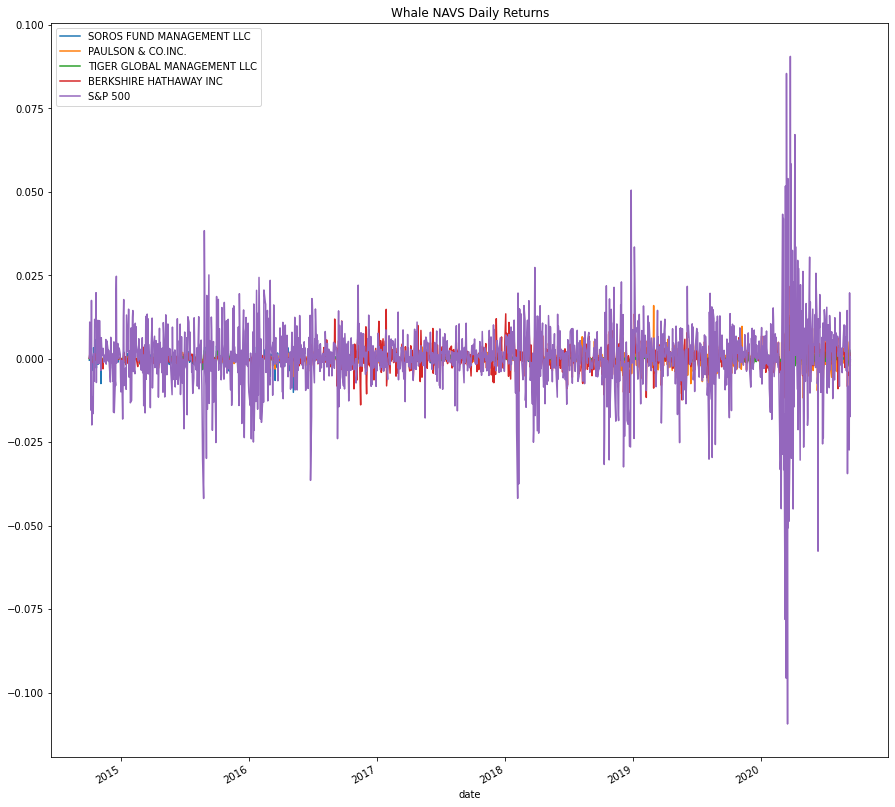

In [6]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
whale_navs_returns.plot(figsize = (15,15), title = "Whale NAVS Daily Returns")


In [7]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
whale_navs_cumulative_returns = ((1 + whale_navs_returns).cumprod())-1
whale_navs_cumulative_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.000609,0.000518,0.000407,0.001420,0.011165
2014-10-06,0.003066,0.000510,0.000474,0.001688,0.009982
2014-10-07,0.000437,0.000193,0.000265,0.001100,-0.005608
2014-10-08,0.000828,0.000563,0.000507,0.001943,0.011783
...,...,...,...,...,...
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341


<AxesSubplot:title={'center':'Whale NAVS Cumulative Returns'}, xlabel='date'>

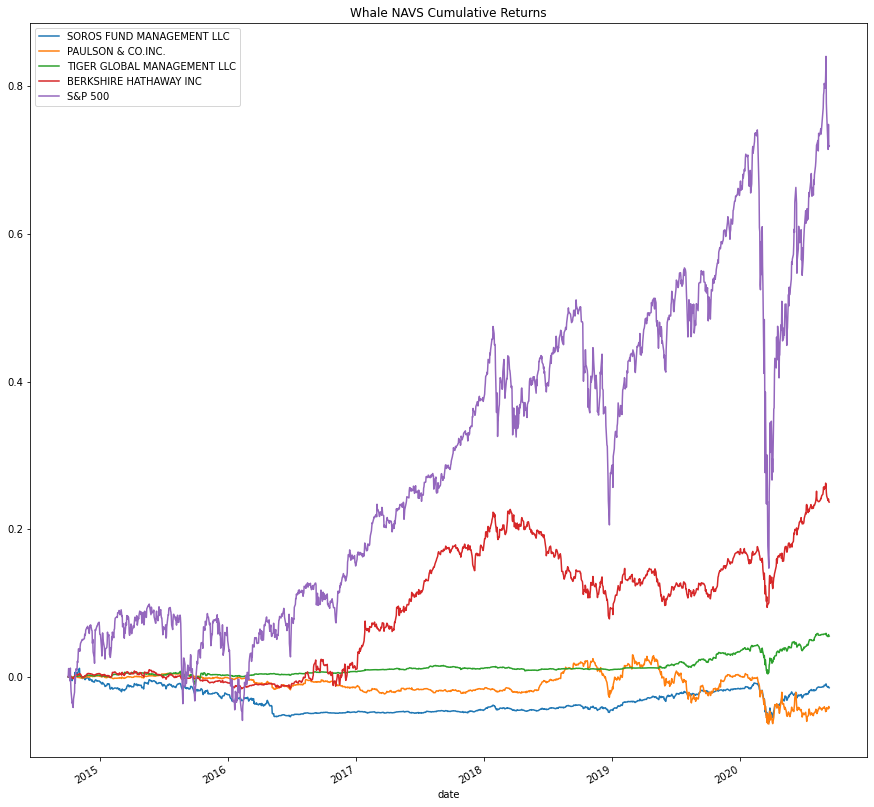

In [8]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
whale_navs_cumulative_returns.plot(figsize = (15,15), title = "Whale NAVS Cumulative Returns")


<AxesSubplot:title={'center':'Whale NAVS Cumulative Returns'}>

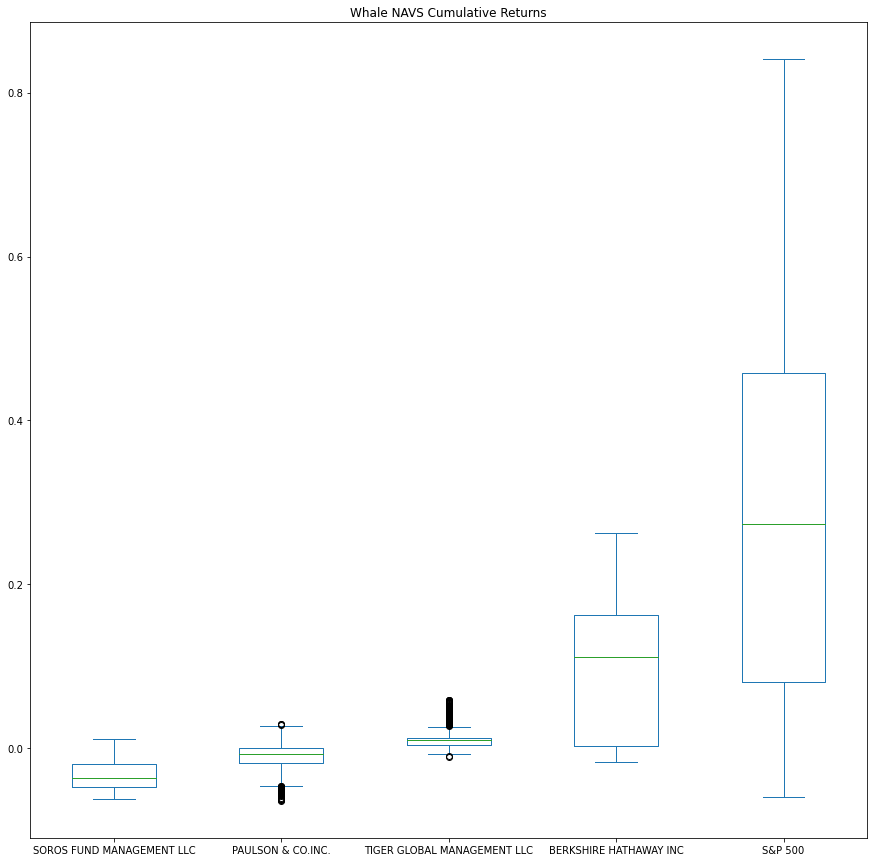

In [9]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size

whale_navs_cumulative_returns.plot(kind= "box", figsize=(15,15), title = "Whale NAVS Cumulative Returns")


<AxesSubplot:title={'center':'Daily Return of 4 Fund'}>

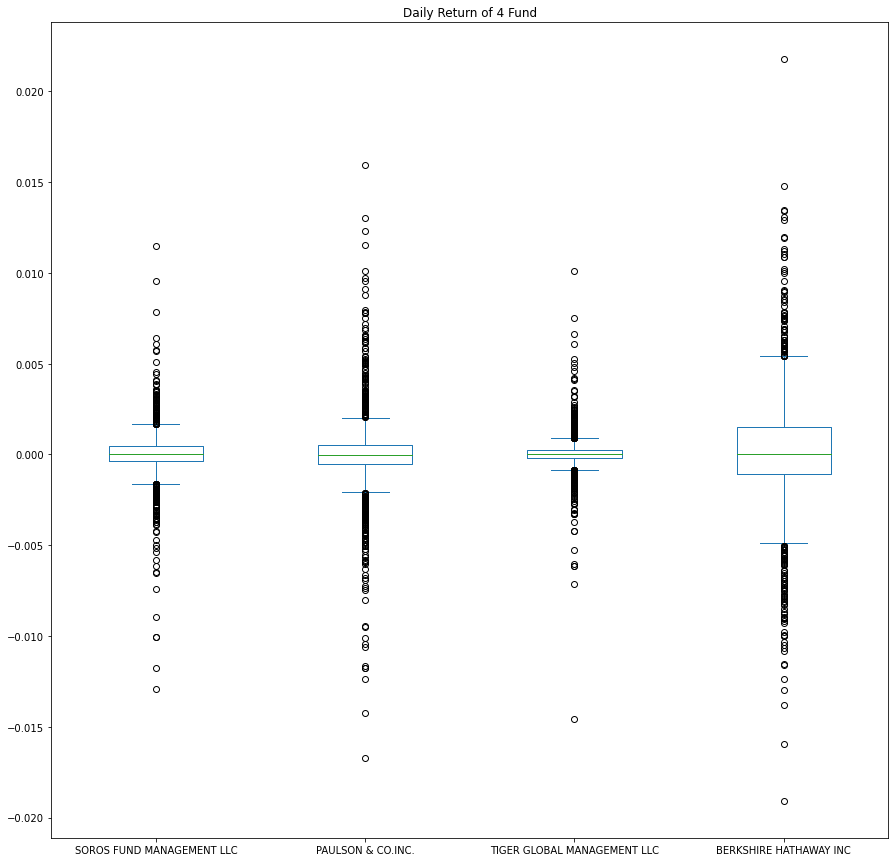

In [10]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size

whale_navs_4fund_daily_return = whale_navs_returns.drop(columns=["S&P 500"])
whale_navs_4fund_daily_return.plot(kind="box", figsize=(15,15), title="Daily Return of 4 Fund")

In [12]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
# YOUR CODE HERE
standard_deviation = whale_navs_df.std().sort_values()
standard_deviation

PAULSON & CO.INC.               0.240011
SOROS FUND MANAGEMENT LLC       0.485997
TIGER GLOBAL MANAGEMENT LLC     0.751144
BERKSHIRE HATHAWAY INC          4.185067
S&P 500                        41.005779
dtype: float64

In [13]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_standard_deviation = standard_deviation * np.sqrt(252)

annualized_standard_deviation.sort_values()

PAULSON & CO.INC.                3.810063
SOROS FUND MANAGEMENT LLC        7.714968
TIGER GLOBAL MANAGEMENT LLC     11.924046
BERKSHIRE HATHAWAY INC          66.435883
S&P 500                        650.946561
dtype: float64

<AxesSubplot:title={'center':'Whale NAVS-21 day Standard Deviation'}, xlabel='date'>

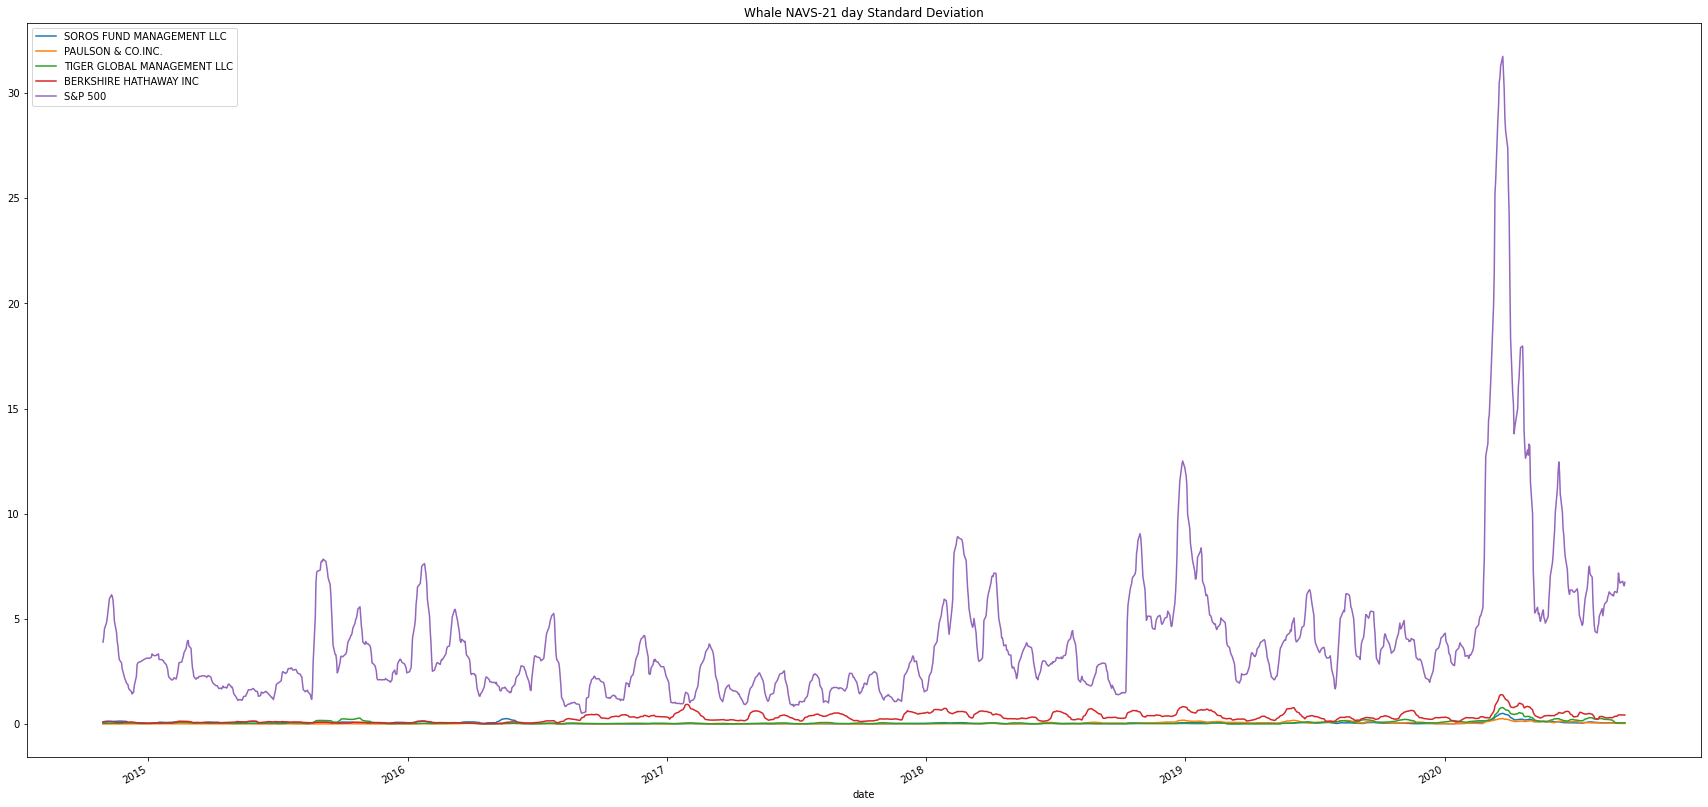

In [66]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
whale_navs_std_21 = whale_navs_df.rolling(window=21).std()
whale_navs_std_21.plot(figsize= (30,15), title = "Whale NAVS-21 day Standard Deviation")


<AxesSubplot:title={'center':'Whale NAVS(four fund)-21 day Standard Deviation'}, xlabel='date'>

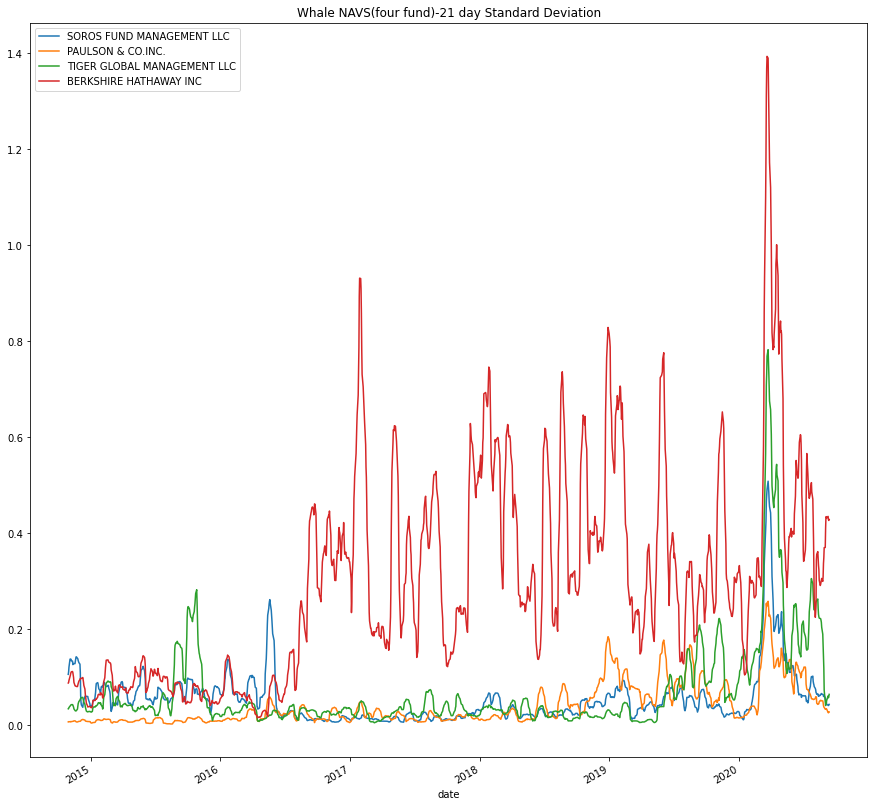

In [15]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
whale_navs_std_21_4 = whale_navs_df.drop(columns=["S&P 500"]).rolling(window=21).std()
whale_navs_std_21_4.plot(figsize= (15,15), title = "Whale NAVS(four fund)-21 day Standard Deviation")

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # BIRKSHIRE

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # It was not indicated on the 21-day rolling window standard deviation chart that the risk of each porfolio increase at the same time that therisk of S&P 500 increase.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # BERKSHIRE porfolio poses the most risk due to a high volatility and it remains low volatile before the middle of 2016 and increases dramatically after that.

---

In [16]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest

average_annual_return_whale_navs = whale_navs_returns.mean()*252
print(f"The annual average return data for the for fund portfolios and the S&P 500:")
average_annual_return_whale_navs.sort_values()


The annual average return data for the for fund portfolios and the S&P 500:


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [17]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest

sharp_ratios = average_annual_return_whale_navs/annualized_standard_deviation
print(f"The annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500:")
sharp_ratios.sort_values()


The annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500:


PAULSON & CO.INC.             -0.001741
SOROS FUND MANAGEMENT LLC     -0.000296
S&P 500                        0.000166
BERKSHIRE HATHAWAY INC         0.000558
TIGER GLOBAL MANAGEMENT LLC    0.000767
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios for four funds and for the S&P 500'}>

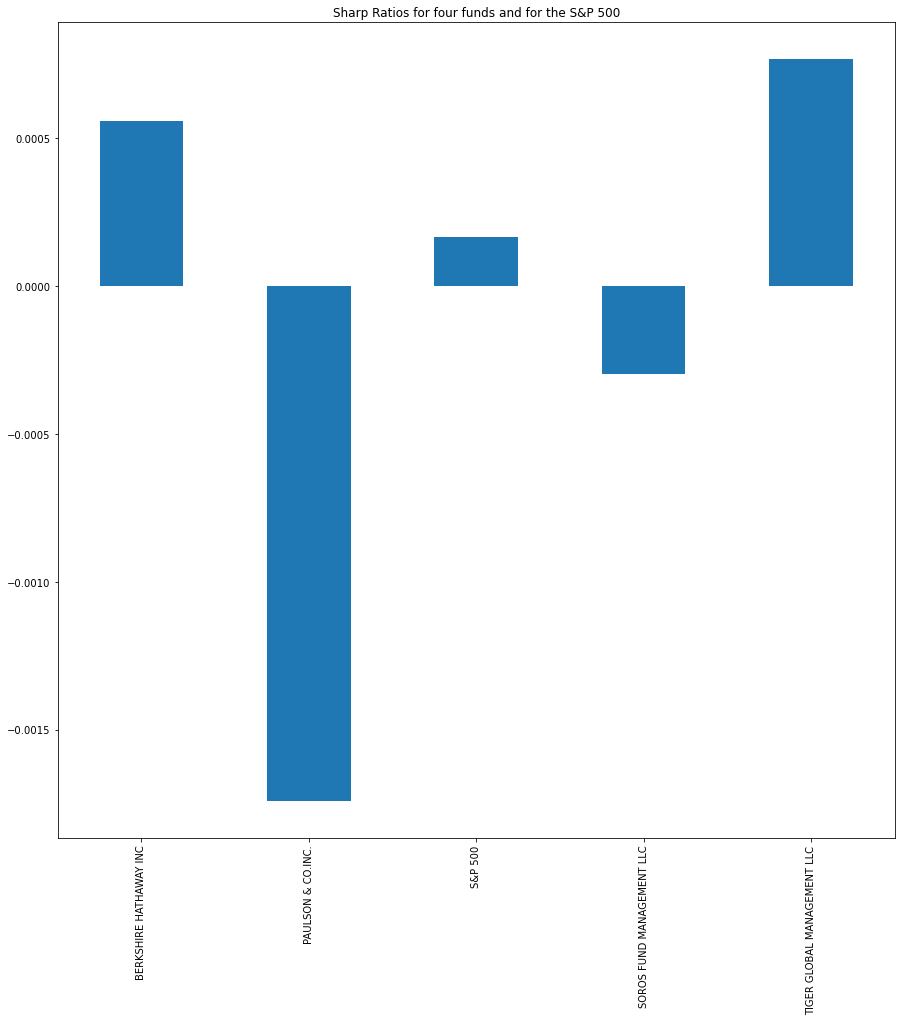

In [18]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
sharp_ratios.plot(kind="bar", figsize=(15,15), title="Sharp Ratios for four funds and for the S&P 500")


**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # The chart indicates Tiger Global offers the best risk-return profile and Paulson & Co offers the worst.

---

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [42]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.

sp500_df = whale_navs_df["S&P 500"]

sp500_var = sp500_df.rolling(window = 60).var()
sp500_var.tail()



date
2020-09-04    207.661086
2020-09-08    200.337030
2020-09-09    196.724716
2020-09-10    194.101667
2020-09-11    190.591195
Name: S&P 500, dtype: float64

##### Portfolio 1 - Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [50]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data

sp500_daily_returns = sp500_df.pct_change().dropna()
sp500_daily_returns

date
2014-10-02    0.000154
2014-10-03    0.011009
2014-10-06   -0.001170
2014-10-07   -0.015436
2014-10-08    0.017489
                ...   
2020-09-04   -0.008165
2020-09-08   -0.027323
2020-09-09    0.019747
2020-09-10   -0.017364
2020-09-11    0.000509
Name: S&P 500, Length: 1497, dtype: float64

In [51]:
bh_covariance = whale_navs_returns["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(sp500_daily_returns)

bh_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [57]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information

bh_beta = bh_covariance/sp500_var
bh_beta.tail()


date
2020-09-04    1.029099e-07
2020-09-08    1.171253e-07
2020-09-09    1.200487e-07
2020-09-10    1.228695e-07
2020-09-11    1.258194e-07
dtype: float64

In [58]:
# Calculate the average of the 60-day rolling beta

bh_average = bh_beta.mean()
bh_average

5.667430501670573e-07

<AxesSubplot:title={'center':' Berkshire Hathaway 60-day rolling beta'}, xlabel='date'>

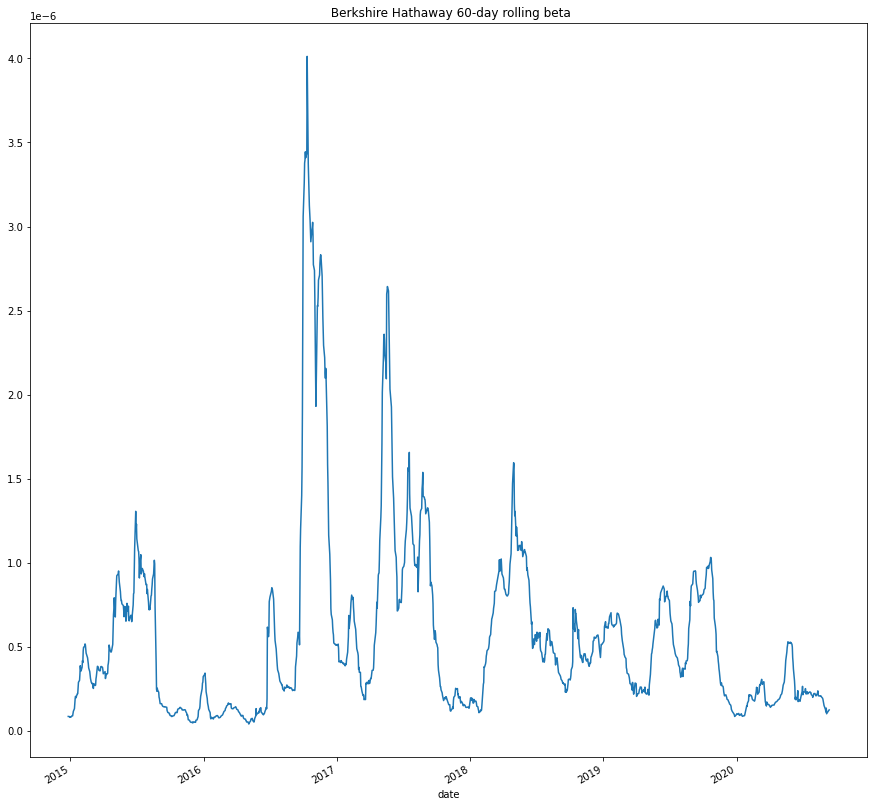

In [65]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

bh_beta.plot(figsize=(15,15), title=" Berkshire Hathaway 60-day rolling beta")

##### Portfolio 2 -  Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [61]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data

tgm_covariance = whale_navs_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window = 60).cov(sp500_daily_returns)

tgm_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [62]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tgm_beta = bh_covariance/sp500_var
tgm_beta.tail()


date
2020-09-04    1.029099e-07
2020-09-08    1.171253e-07
2020-09-09    1.200487e-07
2020-09-10    1.228695e-07
2020-09-11    1.258194e-07
dtype: float64

In [63]:
# Calculate the average of the 60-day rolling beta
tgm_average = tgm_beta.mean()
tgm_average

5.667430501670573e-07

<AxesSubplot:title={'center':' Tiger Global Management 60-day rolling beta'}, xlabel='date'>

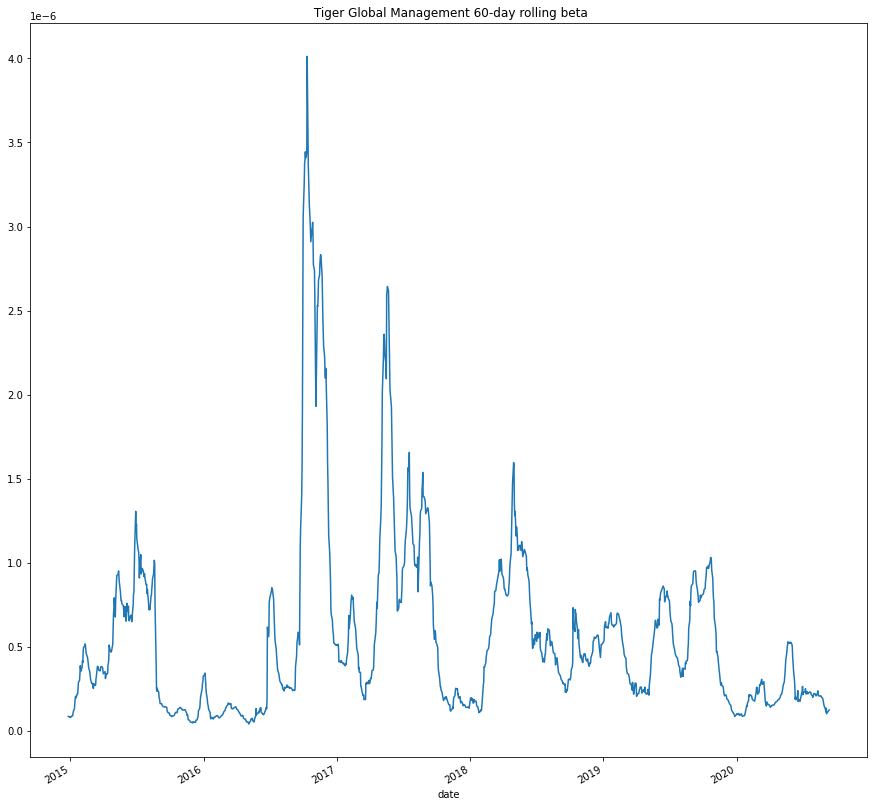

In [64]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
tgm_beta.plot(figsize=(15,15), title=" Tiger Global Management 60-day rolling beta")

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # In my opinion, it should be Tiger Global and Berkshire Hathaway.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # I'll recommand Tiger Global and Berkshire Hathaway.

---